<h1 style="color:#ffc0cb;font-size:30px;font-family:Georgia;text-align:center;"><strong>Project Planning<strong style="color:black;font-size:25px;font-family:Georgia;"></strong></h1>

[Click here to see details](https://smoosavi.org/datasets/us_accidents)

When starting any project, I like to outline the steps that I plan to take. Below is the rough outline that I created for this project using commented cells.

#### Understand nature of the data .info() .describe()
#### Histograms and boxplots 
#### Value counts 
#### Missing data 
#### Correlation between the metrics 
#### Explore interesting themes  
#### Feature engineering 
#### preprocess data together or use a transformer? 
    # use label for train and test   
#### Scaling?

#### Model Baseline 
#### Model comparison with CV

<h1 style="color:#ffc0cb;font-size:30px;font-family:Georgia;text-align:center;"><strong>Table of content<strong style="color:black;font-size:25px;font-family:Georgia;"></strong></h1>



### 1. [OVERVIEW AND IMPORTING DATA](#1)

    1.1 [Overview](#1.1)

        1.2 [Required  Libraries](#1.2)

<br>
### 2. [Exploratory Data Analysis (EDA)](#2)

    2.1 [Number of Accidents per State](#2.1)

2.2 [Most frequent words in the description](#2.2)

2.3 [Most frequent road features](#2.3)

2.4 [Medium distance by severity](#2.4)

2.5 [Weather condition histogram](#2.5)

2.6 [Number of accidents for weekday](#2.6)

<br>
### 3. [DATA PREPROCESSING](#3)
    

3.1 [Feature addition](#3.1)

3.2 [Check correlation between features](#3.2)

3.3 [Feature selection](#3.3)

3.4 [Drop duplicates](#3.4)

3.5 [Handle erroneous and missing values](#3.5)

3.6 [Check features variance](#3.6)

3.7 [Handle unbalanced data](#3.7)

3.8 [Feature scaling](#3.8)

3.9 [Feature encoding](#3.9)

<br>
### 4. [MODEL](#4)

4.1 [Logistic regression](#4.1)

4.2 [Decision Tree](#4.2)

4.3 [Random Forest](#4.3)

<br>
### 5. [RESULT](#5)

<a id="1.1"></a>
<h1 style="color:#ffc0cb;font-size:30px;font-family:Georgia;text-align:center;"><strong>Overview Dataset<strong style="color:black;font-size:25px;font-family:Georgia;"></strong></h1>


Details about features in the dataset:

**Traffic Attributes (12)**:

* **ID**: This is a unique identifier of the accident record.

* **Source**: Indicates source of the accident report (i.e. the API which reported the accident.).

* **TMC**: A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.

* **Severity**: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

* **Start_Time**: Shows start time of the accident in local time zone.

* **End_Time**: Shows end time of the accident in local time zone.

* **Start_Lat**: Shows latitude in GPS coordinate of the start point.

* **Start_Lng**: Shows longitude in GPS coordinate of the start point.

* **End_Lat**: Shows latitude in GPS coordinate of the end point.

* **End_Lng**: Shows longitude in GPS coordinate of the end point.

* **Distance(mi)**: The length of the road extent affected by the accident.

* **Description**: Shows natural language description of the accident.

**Address Attributes (9)**:

* **Number**: Shows the street number in address field.

* **Street**: Shows the street name in address field.

* **Side**: Shows the relative side of the street (Right/Left) in address field.

* **City**: Shows the city in address field.

* **County**: Shows the county in address field.

* **State**: Shows the state in address field.

* **Zipcode**: Shows the zipcode in address field.

* **Country**: Shows the country in address field.

* **Timezone**: Shows timezone based on the location of the accident (eastern, central, etc.).

**Weather Attributes (11)**:

* **Airport_Code**: Denotes an airport-based weather station which is the closest one to location of the accident.

* **Weather_Timestamp**: Shows the time-stamp of weather observation record (in local time).

* **Temperature(F)**: Shows the temperature (in Fahrenheit).

* **Wind_Chill(F)**: Shows the wind chill (in Fahrenheit).

* **Humidity(%)**: Shows the humidity (in percentage).

* **Pressure(in)**: Shows the air pressure (in inches).

* **Visibility(mi)**: Shows visibility (in miles).

* **Wind_Direction**: Shows wind direction.

* **Wind_Speed(mph)**: Shows wind speed (in miles per hour).

* **Precipitation(in)**: Shows precipitation amount in inches, if there is any.

* **Weather_Condition**: Shows the weather condition (rain, snow, thunderstorm, fog, etc.).

**POI Attributes (13)**:

* **Amenity**: A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.

* **Bump**: A POI annotation which indicates presence of speed bump or hump in a nearby location.

* **Crossing**: A POI annotation which indicates presence of crossing in a nearby location.

* **Give_Way**: A POI annotation which indicates presence of give_way sign in a nearby location.

* **Junction**: A POI annotation which indicates presence of junction in a nearby location.

* **No_Exit**: A POI annotation which indicates presence of no_exit sign in a nearby location.

* **Railway**: A POI annotation which indicates presence of railway in a nearby location.

* **Roundabout**: A POI annotation which indicates presence of roundabout in a nearby location.

* **Station**: A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.

* **Stop**: A POI annotation which indicates presence of stop sign in a nearby location.

* **Traffic_Calming**: A POI annotation which indicates presence of traffic_calming means in a nearby location.

* **Traffic_Signal**: A POI annotation which indicates presence of traffic_signal in a nearby location.

* **Turning_Loop**: A POI annotation which indicates presence of turning_loop in a nearby location.

**Period-of-Day (4)**:

* **Sunrise_Sunset**: Shows the period of day (i.e. day or night) based on sunrise/sunset.

* **Civil_Twilight**: Shows the period of day (i.e. day or night) based on civil twilight.

* **Nautical_Twilight**: Shows the period of day (i.e. day or night) based on nautical twilight.

* **Astronomical_Twilight**: Shows the period of day (i.e. day or night) based on astronomical twilight.

# Task 1: Data Preparation

Perform all necessary data cleaning and preparation steps as in the lecture (similar to Assignment 1). 
#### Note: These steps must be performed consistently for both training and testing dataset

# 1.2: Data exploration
Explore at least 3 columns or column pairs

using appropriate descriptive statistics and graphs (if appropriate),

e.g. the distribution of a numerical attribute, the proportion of each value of a categorical attribute.

For each explored column, please think carefully and report in your notebook:
1) the way you used to explore a column (e.g. the graph); 
2) what you can observe from the way you used to explore it.

(Please format each graph carefully, and use it in your final report.
You need to include appropriate
labels on the x-axis and y-axis, a title, and a legend.
The fonts should be sized for good readability. Components of
the graphs should be coloured appropriately, if applicable.). 
#### Note: These steps are for the training dataset only.

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} missingno

# work with data in tabular representation
from datetime import time

import pandas as pd
# round the data in the correlation matrix
import numpy as np
# module for regular expression
import re

# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# run a python file 
%run function.py

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Eror Messages
import warnings

warnings.filterwarnings('ignore')

Solving environment: done

## Package Plan ##

  environment location: /Users/taa/opt/anaconda3

  added / updated specs:
    - missingno


The following NEW packages will be INSTALLED:

  missingno          pkgs/main/noarch::missingno-0.4.2-pyhd3eb1b0_1

The following packages will be UPDATED:

  conda                               4.10.1-py38hecd8cb5_1 --> 4.11.0-py38hecd8cb5_0


Preparing transaction: done
Verifying transaction: failed

EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: /Users/taa/opt/anaconda3
  uid: 1163210130
  gid: 721532113




In [2]:
# check version of Numpy (to create a requirements.txt)
np.__version__

'1.20.1'

In [3]:
# check version of Pandas (to create a requirements.txt)
pd.__version__

'1.2.4'

# [Detail of the dataset](https://smoosavi.org/datasets/us_accidents)

#### Original Memory usage of each dataset
+ TRAIN: memory usage: 120.1+ MB
+ TEST: memory usage: 40.0+ MB
+ VALIDATION: memory usage: 40.0+ MB

#### Understand the problem
+ Data Type: Tabular data
+ Problem Type: Classification
+ Evaludation Metric: AUC, F1, LogLoss

In [4]:
from function import style
%time

# TRAIN
# read and drop drop ID column-wise
# train = pd.read_csv('cosc2789-2021/train.csv', parse_dates=['End_Time', 'Start_Time', 'Weather_Timestamp']).drop("ID", axis=1)
train = pd.read_csv('cosc2789-2021/train.csv').drop("ID", axis=1)
# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(
    f'The TRAIN Dataframe contain {train.shape[0]} records and {train.shape[1]} columns.\n\n')  # 454819 rows and 45 columns
# lets make end time as index
train = train.sort_values(by=['End_Time'])
# use the .info() method, which will print out a concise summary of the DataFrame:
print(train.info())
# print out first 3 lines of the dataframe
# style(train.head(3))


# VALIDATION
# read and drop drop ID column-wise
validation = pd.read_csv('cosc2789-2021/val.csv').drop("ID", axis=1)
# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(
    f'The VALIDATION Dataframe contain {validation.shape[0]} records and {validation.shape[1]} columns.\n\n')  # 151606 rows and 45 columns
# lets make end time as index
validation = validation.sort_values(by=['End_Time'])
# use the .info() method, which will print out a concise summary of the DataFrame:
print(validation.info())
# print out first 3 lines of the dataframe
# style(validation.head(3))


# TRAIN
# read and drop drop ID column-wise
test = pd.read_csv('cosc2789-2021/test.csv')
# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(
    f'The TEST Dataframe contain {test.shape[0]} records and {test.shape[1]} columns.\n\n')  # 151607 rows and 44 columns
# lets make end time as index
test = test.sort_values(by=['End_Time'])
# use the .info() method, which will print out a concise summary of the DataFrame:
print(test.info())
# print out first 3 lines of the dataframe
style(test.head(3))

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 4.05 µs
The TRAIN Dataframe contain 454819 records and 45 columns.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 454819 entries, 377127 to 391941
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               454819 non-null  int64  
 1   Start_Time             454819 non-null  object 
 2   End_Time               454819 non-null  object 
 3   Start_Lat              454819 non-null  float64
 4   Start_Lng              454819 non-null  float64
 5   End_Lat                454819 non-null  float64
 6   End_Lng                454819 non-null  float64
 7   Distance(mi)           454819 non-null  float64
 8   Number                 140896 non-null  float64
 9   Street                 454819 non-null  object 
 10  Side                   454819 non-null  object 
 11  City                   454796 non-null  object 
 12  County  

,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
147642,A-2716608,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227000,nan,I-75 S,R,Dayton,Montgomery,OH,45404,US,US/Eastern,KFFO,2016-02-08 08:18:00,33.800000,nan,100.000000,29.630000,3.000000,SW,2.300000,nan,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2768,A-2716609,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521000,nan,I-71 S,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2016-02-08 11:51:00,33.100000,30.000000,92.000000,29.630000,0.500000,SW,3.500000,0.080000,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
142316,A-2716615,2016-02-08 17:30:18,2016-02-08 23:30:18,39.582242,-83.677814,39.603013,-83.637319,2.590000,nan,I-71 N,R,Jamestown,Greene,OH,45335,US,US/Eastern,KSGH,2016-02-08 17:28:00,33.800000,28.600000,93.000000,29.640000,1.000000,West,5.800000,0.010000,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
# read and drop drop ID column-wise
validation = pd.read_csv('cosc2789-2021/val.csv').drop("ID", axis=1)

# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(
    f'The VALIDATION Dataframe contain {validation.shape[0]} records and {validation.shape[1]} columns.\n\n')  # 151606 rows and 45 columns

# lets make end time as index
validation = validation.sort_values(by=['End_Time'])

# use the .info() method, which will print out a concise summary of the DataFrame:
print(validation.info())

# print out first 3 lines of the dataframe
style(validation.head(3))

The VALIDATION Dataframe contain 151606 records and 45 columns.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 151606 entries, 148772 to 37658
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               151606 non-null  int64  
 1   Start_Time             151606 non-null  object 
 2   End_Time               151606 non-null  object 
 3   Start_Lat              151606 non-null  float64
 4   Start_Lng              151606 non-null  float64
 5   End_Lat                151606 non-null  float64
 6   End_Lng                151606 non-null  float64
 7   Distance(mi)           151606 non-null  float64
 8   Number                 46791 non-null   float64
 9   Street                 151606 non-null  object 
 10  Side                   151606 non-null  object 
 11  City                   151593 non-null  object 
 12  County                 151606 non-null  object 
 13  State              

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
148772,2,2016-02-08 14:19:57,2016-02-08 20:19:57,40.702247,-84.075887,40.699110,-84.084293,0.491000,nan,E Hanthorn Rd,R,Lima,Allen,OH,45806,US,US/Eastern,KAOH,2016-02-08 13:53:00,39.000000,31.800000,70.000000,29.590000,10.000000,WNW,11.500000,nan,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
135541,3,2016-02-08 18:11:11,2016-02-09 00:11:11,40.151785,-81.312635,40.151747,-81.312682,0.004000,48999.000000,Titus Rd,R,Freeport,Guernsey,OH,43973,US,US/Eastern,KPHD,2016-02-08 18:23:00,33.100000,nan,92.000000,29.620000,10.000000,Calm,nan,nan,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
108049,2,2016-02-09 06:10:59,2016-02-09 12:10:59,39.857980,-84.281810,39.864410,-84.215540,3.543000,nan,I-70 E,R,Dayton,Montgomery,OH,45415,US,US/Eastern,KDAY,2016-02-09 06:03:00,23.000000,10.100000,88.000000,29.660000,2.000000,West,15.000000,0.000000,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day


In [6]:
# read and drop drop ID column-wise
test = pd.read_csv('cosc2789-2021/test.csv')

# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(
    f'The TEST Dataframe contain {test.shape[0]} records and {test.shape[1]} columns.\n\n')  # 151607 rows and 44 columns

# lets make end time as index
test = test.sort_values(by=['End_Time'])

# use the .info() method, which will print out a concise summary of the DataFrame:
print(test.info())

# print out first 3 lines of the dataframe
style(test.head(3))

The TEST Dataframe contain 151607 records and 45 columns.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 151607 entries, 147642 to 147842
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     151607 non-null  object 
 1   Start_Time             151607 non-null  object 
 2   End_Time               151607 non-null  object 
 3   Start_Lat              151607 non-null  float64
 4   Start_Lng              151607 non-null  float64
 5   End_Lat                151607 non-null  float64
 6   End_Lng                151607 non-null  float64
 7   Distance(mi)           151607 non-null  float64
 8   Number                 47082 non-null   float64
 9   Street                 151607 non-null  object 
 10  Side                   151607 non-null  object 
 11  City                   151604 non-null  object 
 12  County                 151607 non-null  object 
 13  State                  1

,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
147642,A-2716608,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227000,nan,I-75 S,R,Dayton,Montgomery,OH,45404,US,US/Eastern,KFFO,2016-02-08 08:18:00,33.800000,nan,100.000000,29.630000,3.000000,SW,2.300000,nan,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2768,A-2716609,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521000,nan,I-71 S,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2016-02-08 11:51:00,33.100000,30.000000,92.000000,29.630000,0.500000,SW,3.500000,0.080000,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
142316,A-2716615,2016-02-08 17:30:18,2016-02-08 23:30:18,39.582242,-83.677814,39.603013,-83.637319,2.590000,nan,I-71 N,R,Jamestown,Greene,OH,45335,US,US/Eastern,KSGH,2016-02-08 17:28:00,33.800000,28.600000,93.000000,29.640000,1.000000,West,5.800000,0.010000,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


**--------->** 
#### OBSERVATIONS:
There are  454819 training examples in the dataset, this is a good sign since there seems to be enough data for machine learning. The shape of the dataset tells is that I have 45 attributes. Of the 45 attributes, one is the target variable that the model should predict. This means that I have 44 attributes that have the potential to be used to train my future predictive model.

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:30px;font-family:Georgia;text-align:center;"><strong>Preprocessing & Exploratory Data Analysis (EDA)<strong style="color:black;font-size:25px;font-family:Georgia;"></strong></h1>

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
In this first part of this notebook we are going to do an EDA of the dataset.

# Task 1.2: Check data types
The dtypes that pandas uses are: `float`, `int`, `bool`, `datetime`, `timedelta`, `category` and `object`. I modify data types in my DataFrames to help me transform them into more meaningful metrics

I am going to parse to all the columns to ensure that the loaded data has appropriate data types assigned.

I drop `ResponseId` to avoid leakage of the data. Moreover, the indexes of the reponses are not relevant for this problem. So I will omit it from the DataFrame and call the `info()` method to **check the data information**


#### Pandas default memory allocation
By default, pandas infers the datatypes of the columns of our dataset in not the most convenient way. Rather, due to its conservative nature, it often results in unnecessary large memory usage for pandas dataframe especially for text data columns with relatively few unique values. One of the ways you can use pandas to scale your data into memory is by lossless compression which I have shown below.

We can pre-define optimal datatypes for our columns based on prior knowledge of the dataset or sample inspection. This way we can store larger datasets in memory.


### Make the data homogeneous
+ Cast pandas objects to a specified dtype dtype (string)¶
+ Numeric data should have for example the same number of digits after the point. 
The `astype()` function supports all datatypes described at [this link](https://www.pytables.org/usersguide/datatypes.html).

In [7]:
# convert columns to the best possible dtypes, object->string
train = train.convert_dtypes()
test = test.convert_dtypes()
validation = validation.convert_dtypes()

# use the .info() method, which will print out a concise summary of the DataFrame:
print(
    f'--------------------This is the data types and not null value summary of the TRAIN Dataframe {train.info()}  --------------------\n\n')
print(
    f'--------------------This is the data types and not null value summary of the TEST Dataframe {test.info()}  --------------------\n\n')
print(
    f'--------------------This is the data types and not null value summary of the VALIDATION Dataframe {validation.info()}  --------------------\n\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454819 entries, 377127 to 391941
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               454819 non-null  Int64  
 1   Start_Time             454819 non-null  string 
 2   End_Time               454819 non-null  string 
 3   Start_Lat              454819 non-null  Float64
 4   Start_Lng              454819 non-null  Float64
 5   End_Lat                454819 non-null  Float64
 6   End_Lng                454819 non-null  Float64
 7   Distance(mi)           454819 non-null  Float64
 8   Number                 140896 non-null  Int64  
 9   Street                 454819 non-null  string 
 10  Side                   454819 non-null  string 
 11  City                   454796 non-null  string 
 12  County                 454819 non-null  string 
 13  State                  454819 non-null  string 
 14  Zipcode                454542 n

**--------> 
OBSERVATION**

The method .info() is great for checking out the data types of the different features already coverted into the desired types and non-null values. However, it is not great for getting a visual picture of what is missing for the different features. You will use missingno for this

In [8]:
# TRAIN
# Number of columns
num = len(train.columns)
print("Number of columns in TRAIN: ", num)
# Print Column names
cols = train.columns.values
print("Columns of TRAIN dataset:", cols, "\n\n")

# select numerical columns 
train_numeric = train.select_dtypes(include=[np.number])
numeric_cols = train_numeric.columns.values
# Number of columns
num = len(numeric_cols)
print("Number of numeric columns in TRAIN: ", num)
# Print Column names
print("Numerical columns of TRAIN dataset:", numeric_cols, "\n\n")

# select non-numeric columns
train_non_numeric = train.select_dtypes(exclude=[np.number])
non_numeric_cols = train_non_numeric.columns.values
# Number of columns
num = len(non_numeric_cols)
print("Number of non-numeric columns in TRAIN: ", num)
print("Non-numerical columns of TRAIN dataset:", non_numeric_cols, "\n\n")

Number of columns in TRAIN:  45
Columns of TRAIN dataset: ['Severity' 'Start_Time' 'End_Time' 'Start_Lat' 'Start_Lng' 'End_Lat'
 'End_Lng' 'Distance(mi)' 'Number' 'Street' 'Side' 'City' 'County' 'State'
 'Zipcode' 'Country' 'Timezone' 'Airport_Code' 'Weather_Timestamp'
 'Temperature(F)' 'Wind_Chill(F)' 'Humidity(%)' 'Pressure(in)'
 'Visibility(mi)' 'Wind_Direction' 'Wind_Speed(mph)' 'Precipitation(in)'
 'Weather_Condition' 'Amenity' 'Bump' 'Crossing' 'Give_Way' 'Junction'
 'No_Exit' 'Railway' 'Roundabout' 'Station' 'Stop' 'Traffic_Calming'
 'Traffic_Signal' 'Turning_Loop' 'Sunrise_Sunset' 'Civil_Twilight'
 'Nautical_Twilight' 'Astronomical_Twilight'] 


Number of numeric columns in TRAIN:  14
Numerical columns of TRAIN dataset: ['Severity' 'Start_Lat' 'Start_Lng' 'End_Lat' 'End_Lng' 'Distance(mi)'
 'Number' 'Temperature(F)' 'Wind_Chill(F)' 'Humidity(%)' 'Pressure(in)'
 'Visibility(mi)' 'Wind_Speed(mph)' 'Precipitation(in)'] 


Number of non-numeric columns in TRAIN:  31
Non-numerical c

In [9]:
numeric_cols.tolist()

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Number',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [10]:
# TEST
# Number of columns
num = len(test.columns)
print("Number of columns in TEST: ", num)
# Print Column names
cols = test.columns.values
print("Columns of TEST dataset:", cols, "\n\n")

# select numerical columns 
test_numeric = test.select_dtypes(include=[np.number])
numeric_cols = test_numeric.columns.values
# Number of columns
num = len(numeric_cols)
print("Number of numeric columns in TEST: ", num)
# Print Column names
print("Numerical columns of TEST dataset:", numeric_cols, "\n\n")

# select non-numeric columns
test_non_numeric = test.select_dtypes(exclude=[np.number])
non_numeric_cols = test_non_numeric.columns.values
# Number of columns
num = len(non_numeric_cols)
print("Number of non-numeric columns in TEST: ", num)
print("Non-numerical columns of TEST dataset:", non_numeric_cols, "\n\n")

Number of columns in TEST:  45
Columns of TEST dataset: ['ID' 'Start_Time' 'End_Time' 'Start_Lat' 'Start_Lng' 'End_Lat' 'End_Lng'
 'Distance(mi)' 'Number' 'Street' 'Side' 'City' 'County' 'State' 'Zipcode'
 'Country' 'Timezone' 'Airport_Code' 'Weather_Timestamp' 'Temperature(F)'
 'Wind_Chill(F)' 'Humidity(%)' 'Pressure(in)' 'Visibility(mi)'
 'Wind_Direction' 'Wind_Speed(mph)' 'Precipitation(in)'
 'Weather_Condition' 'Amenity' 'Bump' 'Crossing' 'Give_Way' 'Junction'
 'No_Exit' 'Railway' 'Roundabout' 'Station' 'Stop' 'Traffic_Calming'
 'Traffic_Signal' 'Turning_Loop' 'Sunrise_Sunset' 'Civil_Twilight'
 'Nautical_Twilight' 'Astronomical_Twilight'] 


Number of numeric columns in TEST:  13
Numerical columns of TEST dataset: ['Start_Lat' 'Start_Lng' 'End_Lat' 'End_Lng' 'Distance(mi)' 'Number'
 'Temperature(F)' 'Wind_Chill(F)' 'Humidity(%)' 'Pressure(in)'
 'Visibility(mi)' 'Wind_Speed(mph)' 'Precipitation(in)'] 


Number of non-numeric columns in TEST:  32
Non-numerical columns of TEST dataset

In [11]:
# VALIDATION
# Number of columns
num = len(validation.columns)
print("Number of columns in VALIDATION: ", num)
# Print Column names
cols = validation.columns.values
print("Columns of VALIDATION dataset:", cols, "\n\n")

# select numerical columns 
validation_numeric = validation.select_dtypes(include=[np.number])
numeric_cols = validation_numeric.columns.values
# Number of columns
num = len(numeric_cols)
print("Number of numeric columns in VALIDATION: ", num)
# Print Column names
print("Numerical columns of VALIDATION dataset:", numeric_cols, "\n\n")

# select non-numeric columns
validation_non_numeric = validation.select_dtypes(exclude=[np.number])
non_numeric_cols = validation_non_numeric.columns.values
# Number of columns
num = len(non_numeric_cols)
print("Number of non-numeric columns in VALIDATION: ", num)
print("Non-numerical columns of VALIDATION dataset:", non_numeric_cols, "\n\n")

Number of columns in VALIDATION:  45
Columns of VALIDATION dataset: ['Severity' 'Start_Time' 'End_Time' 'Start_Lat' 'Start_Lng' 'End_Lat'
 'End_Lng' 'Distance(mi)' 'Number' 'Street' 'Side' 'City' 'County' 'State'
 'Zipcode' 'Country' 'Timezone' 'Airport_Code' 'Weather_Timestamp'
 'Temperature(F)' 'Wind_Chill(F)' 'Humidity(%)' 'Pressure(in)'
 'Visibility(mi)' 'Wind_Direction' 'Wind_Speed(mph)' 'Precipitation(in)'
 'Weather_Condition' 'Amenity' 'Bump' 'Crossing' 'Give_Way' 'Junction'
 'No_Exit' 'Railway' 'Roundabout' 'Station' 'Stop' 'Traffic_Calming'
 'Traffic_Signal' 'Turning_Loop' 'Sunrise_Sunset' 'Civil_Twilight'
 'Nautical_Twilight' 'Astronomical_Twilight'] 


Number of numeric columns in VALIDATION:  14
Numerical columns of VALIDATION dataset: ['Severity' 'Start_Lat' 'Start_Lng' 'End_Lat' 'End_Lng' 'Distance(mi)'
 'Number' 'Temperature(F)' 'Wind_Chill(F)' 'Humidity(%)' 'Pressure(in)'
 'Visibility(mi)' 'Wind_Speed(mph)' 'Precipitation(in)'] 


Number of non-numeric columns in VALIDA

# Guess the missingness type 

#### 3 types of missingness patterns:
+ Missing completely at Random (MCAR)
+ Missing at Random (MAR)
+ Missing Not at Random (MNAR)

In this exercise you'll first visualize the missingness summary and then identify the types of missingness the DataFrame contains.

Missing values in TRAIN in ascending: 
                         Total  Percent
Number                 313923    69.02
Precipitation(in)      153417    33.73
Wind_Chill(F)          134958    29.67
Wind_Speed(mph)         38716     8.51
Humidity(%)             13670     3.01
Visibility(mi)          13276     2.92
Weather_Condition       13196     2.90
Temperature(F)          12910     2.84
Wind_Direction          12570     2.76
Pressure(in)            10865     2.39
Weather_Timestamp        9104     2.00
Airport_Code             1294     0.28
Timezone                  690     0.15
Zipcode                   277     0.06
Sunrise_Sunset             23     0.01
Civil_Twilight             23     0.01
Nautical_Twilight          23     0.01
Astronomical_Twilight      23     0.01
City                       23     0.01


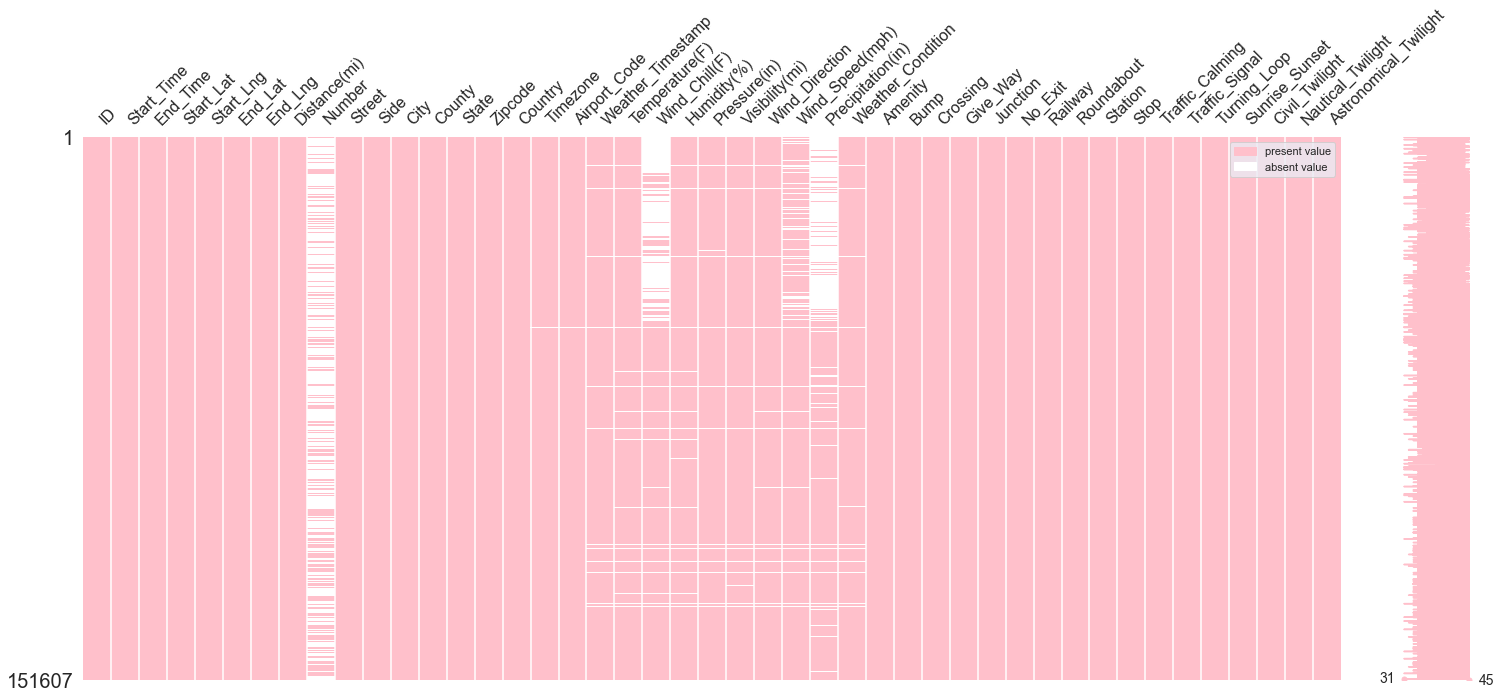

In [12]:
# display missing values in descending
print("Missing values in TRAIN in ascending: \n", missing_percentage(train))

# visualize where the missing values are located
msno.matrix(test, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

Missing values in TEST in ascending: 
                         Total  Percent
Number                 104525    68.94
Precipitation(in)       50853    33.54
Wind_Chill(F)           44908    29.62
Wind_Speed(mph)         12895     8.51
Humidity(%)              4584     3.02
Visibility(mi)           4456     2.94
Weather_Condition        4433     2.92
Temperature(F)           4345     2.87
Wind_Direction           4195     2.77
Pressure(in)             3638     2.40
Weather_Timestamp        3013     1.99
Airport_Code              431     0.28
Timezone                  245     0.16
Zipcode                    82     0.05
Sunrise_Sunset              3      NaN
Civil_Twilight              3      NaN
Nautical_Twilight           3      NaN
Astronomical_Twilight       3      NaN
City                        3      NaN


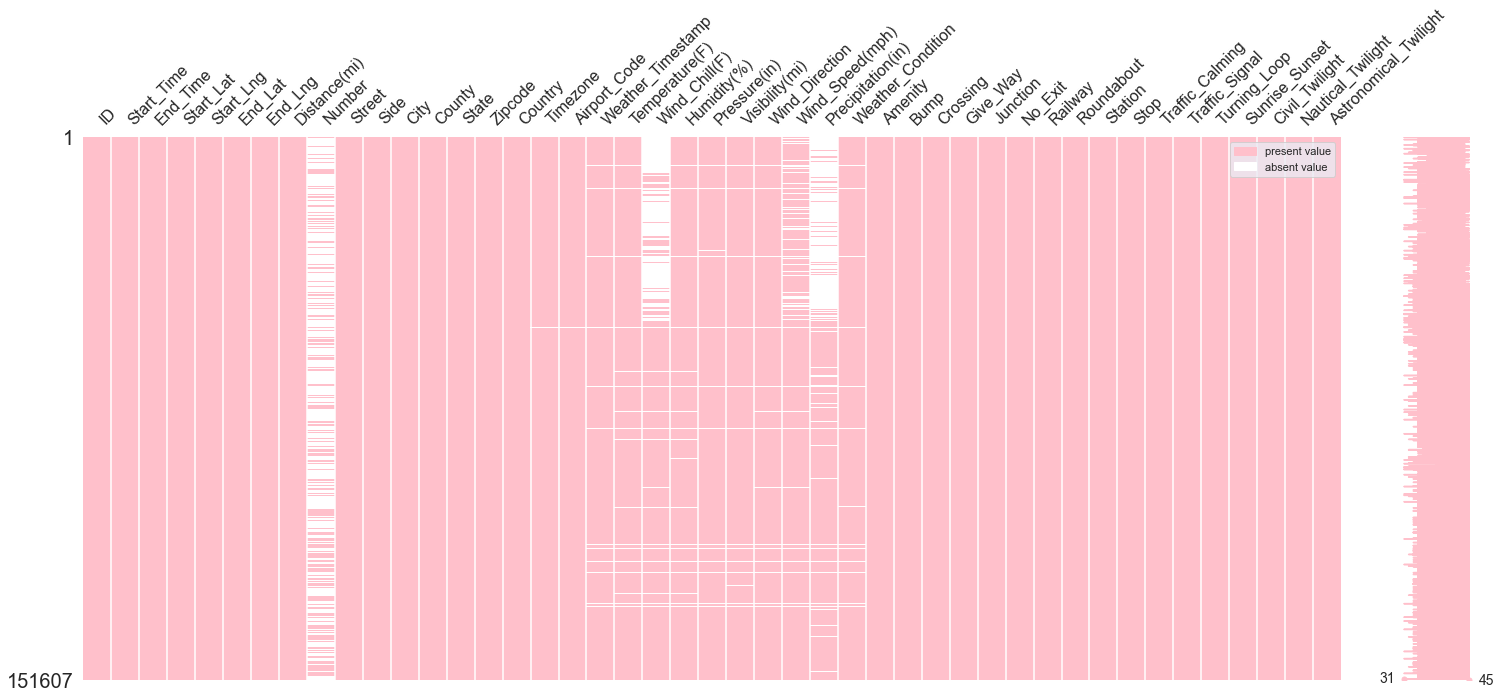

In [13]:
# display missing values in descending
print("Missing values in TEST in ascending: \n", missing_percentage(test))

# visualize where the missing values are located
msno.matrix(test, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

Missing values in VALIDATION in ascending: 
                         Total  Percent
Number                 104815    69.14
Precipitation(in)       51332    33.86
Wind_Chill(F)           45147    29.78
Wind_Speed(mph)         12977     8.56
Humidity(%)              4545     3.00
Visibility(mi)           4467     2.95
Weather_Condition        4443     2.93
Temperature(F)           4312     2.84
Wind_Direction           4203     2.77
Pressure(in)             3641     2.40
Weather_Timestamp        3050     2.01
Airport_Code              428     0.28
Timezone                  240     0.16
Zipcode                    99     0.07
Sunrise_Sunset             13     0.01
Civil_Twilight             13     0.01
Nautical_Twilight          13     0.01
Astronomical_Twilight      13     0.01
City                       13     0.01


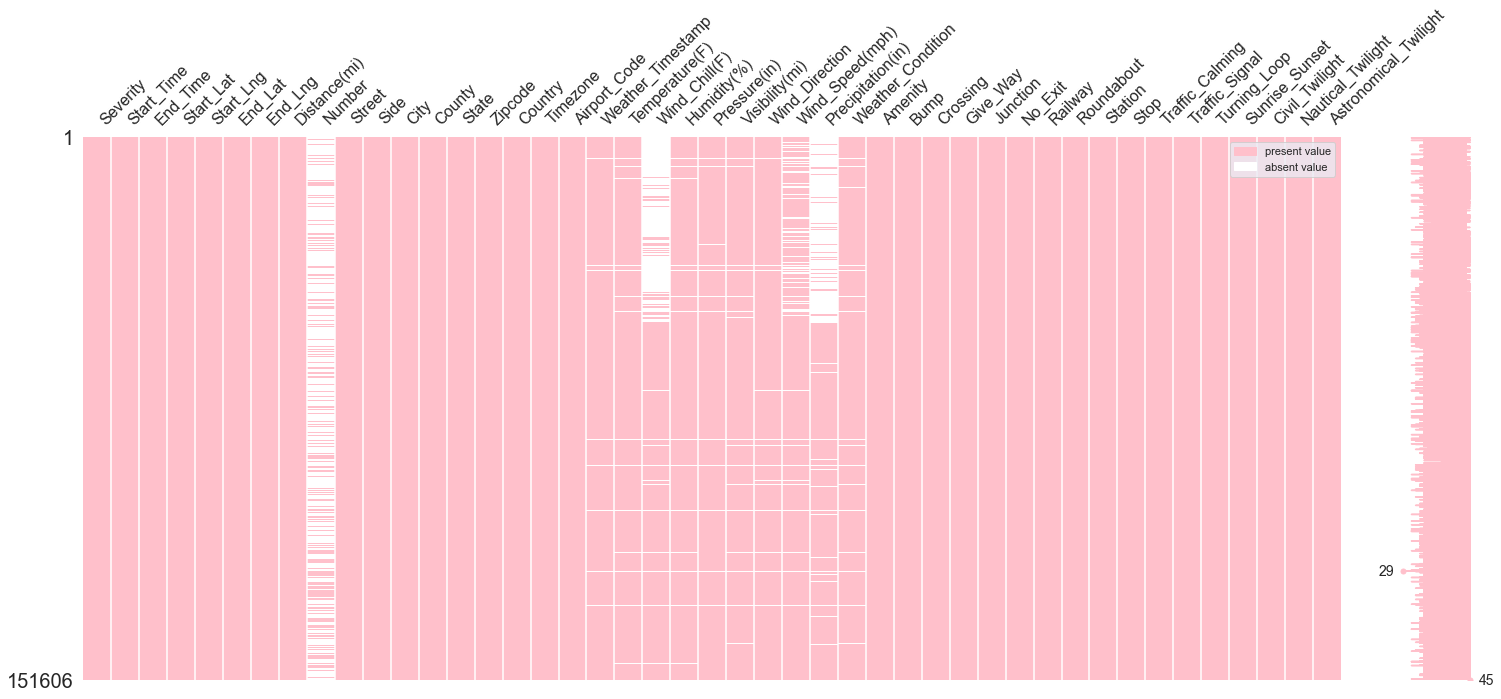

In [14]:
# display missing values in descending
print("Missing values in VALIDATION in ascending: \n", missing_percentage(validation))

# visualize where the missing values are located
msno.matrix(validation, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

**------> OBSERVATION**
+ Only a few missing values of the dataframes suggests that it MIGHT be missing completely at random!
+ There is a strong correlation the strong correlation between `Number`, `Wind Chill(F)` and `Precipitation(in)`.  
+ I'm going to delete any missing column that has IS COMPLETELY AT RANDOM (MCAR) AND the number of missing values is VERY SMALL

Sunrise_Sunset                3

Civil_Twilight                3

Nautical_Twilight             3

Astronomical_Twilight         3

City                          3

### DROP MISSING VALUE LISTWISE & PAIRWISE FOR TESTSET

In [15]:
# listwise delete the rows
train.dropna(subset=['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'City'],
             how='any', inplace=True)
validation.dropna(subset=['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'City'],
                  how='any', inplace=True)

# Drop 1 class column that does not contribute in my prediction

+ `Street` Shows the street number in address field which too specific for the prediction and have too much missing values (>60%).

+ `Country` shows the dataset is about accidents happening in the United States.

In [16]:
# listwise delete the column with meaningless data point

print("Number of categories in Country column - TRAIN:", train.Country.nunique())
print("Categories in TRAIN:", train.Country.unique())

print("Number of categories in Country column - TEST:", test.Country.nunique())
print("Categories in TEST:", test.Country.unique())

print("Number of categories in Country column - VALIDATION:", validation.Country.nunique())
print("Categories in VALIDATION:", validation.Country.unique())

Number of categories in Country column - TRAIN: 1
Categories in TRAIN: <StringArray>
['US']
Length: 1, dtype: string
Number of categories in Country column - TEST: 1
Categories in TEST: <StringArray>
['US']
Length: 1, dtype: string
Number of categories in Country column - VALIDATION: 1
Categories in VALIDATION: <StringArray>
['US']
Length: 1, dtype: string


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


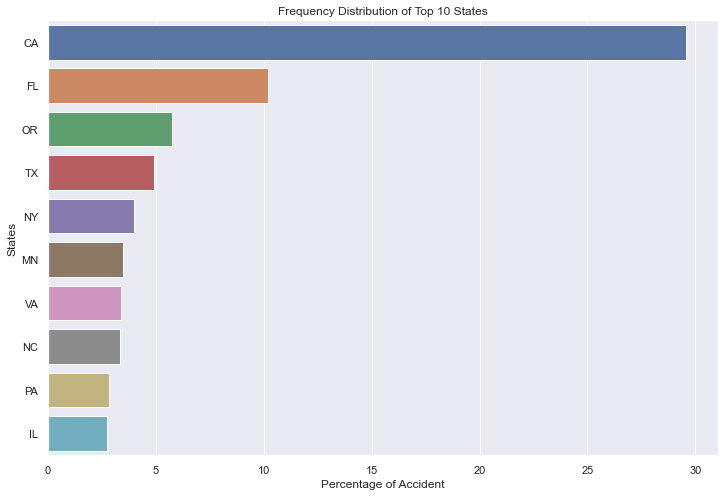

In [17]:
%time

state_percentage = train['State'].value_counts() * 100 / len(train)
sns.set(style="darkgrid")

# state_count
plt.figure(figsize=(12, 8))
sns.barplot(state_percentage.values[:10], state_percentage.index[:10])
plt.title('Frequency Distribution of Top 10 States')

plt.ylabel('States', fontsize=12)
plt.xlabel('Percentage of Accident', fontsize=12)
#plt.xticks(rotation = 45)
plt.show()

**----------> OBSERVATION:**
As we can clearly see, the state having the most number of accidents is California followed by Florida.

In [18]:
print("Number of categories:", train.Turning_Loop.nunique())
print("Categories:", train.Turning_Loop.unique())

Number of categories: 1
Categories: <BooleanArray>
[False]
Length: 1, dtype: boolean


In [19]:
print(f'NUMBER OF CATEGORIES: {train.Street.nunique()}; \nUNIQUE NAMES OF THE CATEGORIES {train.Street.unique()}\n')


NUMBER OF CATEGORIES: 53871; 
UNIQUE NAMES OF THE CATEGORIES <StringArray>
[          'US-50 E',            'I-77 N',    'State Route 32',
       'Outerbelt W',           'US-33 S',       'North Fwy N',
            'I-75 S',            'I-70 E',           'I-675 S',
     ' Long Lake Ln',
 ...
 'Dan Brown Hill Rd',   ' Terry Park Cir', ' Hayne Stretch Rd',
    ' Radebaugh Way', ' Marshall Park Ln',    'Point Lobos St',
     'Jennie Lee Ln',     'Sangertown Sq',     ' Kendrick Ave',
      'NFS Road 104']
Length: 53871, dtype: string



# Most frequent street type of an accident with severity 4¶
We are going to compute the most frequent words in the description column of the accidents with a value of severity equal to 4, using some stopwords from the english language.

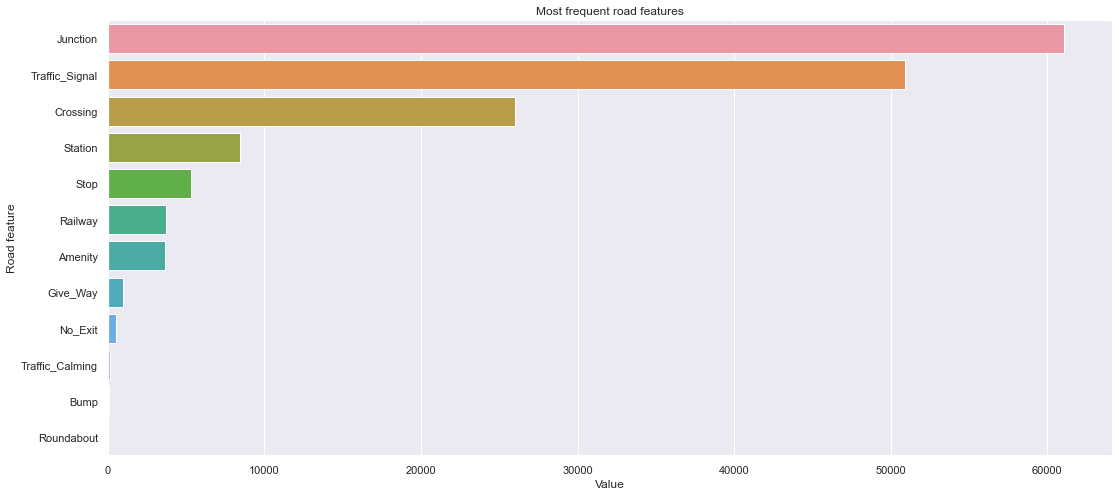

In [20]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station",
                 "Stop", "Traffic_Calming", "Traffic_Signal"]
data = train[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Most frequent road features")
sns.barplot(data.values, data.index, orient="h")
plt.xlabel("Value")
plt.ylabel("Road feature")
plt.show()

**----------> OBSERVAITON:**

+ We can remove the country and turning loop column as the data is based on single country and turning loop And we can also check if there are any other columns with single categorical value that can be dropped

+  Number has 64% of missing data and can be removed as this would not be used for analysis. 

+ Precipitation(in) has 57% of missing data but this one is a key factor for rain/snow so can be recovered with these feature columns but the preciptation must be changed to categorical value. + Wind_Chill(F) the percentage of missing data is 53, considering the fact of this feature, this can also be removed.


+  Augmenting with Reverse Geo-Coding.Raw traffic accidentrecords contain only GPS data. The data collection process perform reverse geocoding to translate GPS coordinates toaddresses, each consisting of astreet number,street name,relativeside (left/right),city,county,state,country, andzip-code. This processis same aspoint-wise map-matching.

+ Timezone, Zipcode, Country, City, State, Street, County, Side all have purpose of pointing to the location

+ An US city can have 2 timezones

+ One Postal Code can have 2 cities, ZIP codes do not generally correspond to city and town boundaries, so having a ZIP code associated with a city is no guarantee that an address is actually located in that city. Second of all, ZIP codes actually have multiple names associated with them.

+ However, Timezone, Zipcode have a lot of NA -> drop since I can use columns with similar meaning for further analysis
+ All the values in the Country column is US means this has constant value. All data points were collected at a location

In [21]:
# drop Country column for all datasets
train = train.drop(labels=['Street', 'Turning_Loop', 'Country', 'Number', 'Wind_Chill(F)'], axis=1)
test = test.drop(labels=['Street', 'Turning_Loop', 'Country', 'Number', 'Wind_Chill(F)'], axis=1)
validation = validation.drop(labels=['Street', 'Turning_Loop', 'Country', 'Number', 'Wind_Chill(F)'], axis=1)

### [Interpolate() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html) - Time series data

### Nearest Value imputation

Draw patterns from non-missing values to predict missing ones and impute the nearest observable value

In [22]:
# Interpolate the NaNs with nearest value for Weather_Timestamp column
train.Weather_Timestamp.interpolate(method='ffill', inplace=True)
test.Weather_Timestamp.interpolate(method='ffill', inplace=True)
validation.Weather_Timestamp.interpolate(method='ffill', inplace=True)

<a id="1.5"></a>
## 1.5 Fix Datetime Format

Since the 'Weather_Timestamp' IS NOT 'Start_Time', I can't delete 'Start_Time'. Then map 'Start_Time' to 'Year', 'Month', 'Weekday', 'Day' (in a year), 'Hour', and 'Minute' (in a day).

# 2.6 Number of accidents for weekday
Here is a plot of the number of accidents appened in each weekday.

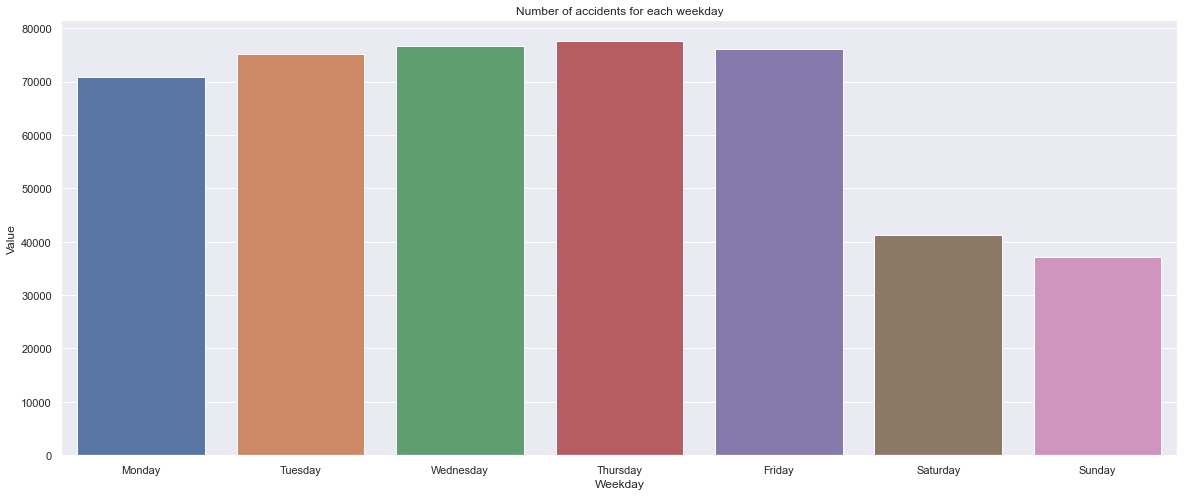

In [23]:
counts = pd.to_datetime(train['Start_Time']).dt.day_name().value_counts()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each weekday")
sns.barplot(counts.index, counts.values, order=weekdays)
plt.xlabel("Weekday")
plt.ylabel("Value")
plt.show()

# I'm gonna bypass hour, minute, and weekday to 

In [24]:
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])


def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])


def get_hours(df, column):
    return df[column].apply(lambda date: date[11:13])


# TRAIN
train['Start_Time_Month'] = get_months(train, 'Start_Time')
train['Start_Time_Year'] = get_years(train, 'Start_Time')
train['Start_Time_Hour'] = get_hours(train, 'Start_Time')

train['End_Time_Month'] = get_months(train, 'End_Time')
train['End_Time_Year'] = get_years(train, 'End_Time')
train['End_Time_Hour'] = get_hours(train, 'End_Time')

train['Weather_Timestamp_Month'] = get_months(train, 'Weather_Timestamp')
train['Weather_Timestamp_Year'] = get_years(train, 'Weather_Timestamp')
train['Weather_Time_Hour'] = get_hours(train, 'Weather_Timestamp')

# TEST
test['Start_Time_Month'] = get_months(test, 'Start_Time')
test['Start_Time_Year'] = get_years(test, 'Start_Time')
test['Start_Time_Hour'] = get_hours(test, 'Start_Time')

test['End_Time_Month'] = get_months(test, 'End_Time')
test['End_Time_Year'] = get_years(test, 'End_Time')
test['End_Time_Hour'] = get_hours(test, 'End_Time')

test['Weather_Timestamp_Month'] = get_months(test, 'Weather_Timestamp')
test['Weather_Timestamp_Year'] = get_years(test, 'Weather_Timestamp')
test['Weather_Time_Hour'] = get_hours(test, 'Weather_Timestamp')

# VALIDATION
validation['Start_Time_Month'] = get_months(validation, 'Start_Time')
validation['Start_Time_Year'] = get_years(validation, 'Start_Time')
validation['Start_Time_Hour'] = get_hours(validation, 'Start_Time')

validation['End_Time_Month'] = get_months(validation, 'End_Time')
validation['End_Time_Year'] = get_years(validation, 'End_Time')
validation['End_Time_Hour'] = get_hours(validation, 'End_Time')

validation['Weather_Timestamp_Month'] = get_months(validation, 'Weather_Timestamp')
validation['Weather_Timestamp_Year'] = get_years(validation, 'Weather_Timestamp')
validation['Weather_Time_Hour'] = get_hours(validation, 'Weather_Timestamp')

# Drop original colums
train = train.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)
test = test.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)
validation = validation.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)

In [25]:
train.head(3)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_Month,Start_Time_Year,Start_Time_Hour,End_Time_Month,End_Time_Year,End_Time_Hour,Weather_Timestamp_Month,Weather_Timestamp_Year,Weather_Time_Hour
377127,2,39.10148,-84.52341,39.09841,-84.52241,0.219,R,Cincinnati,Hamilton,OH,45202,US/Eastern,KLUK,36.0,97,29.7,10.0,Calm,<NA>,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,Night,Night,Night,Day,02,2016,06,02,2016,12,02,2016,05
108963,2,41.06213,-81.53784,41.06217,-81.53547,0.123,R,Akron,Summit,OH,44311,US/Eastern,KAKR,39.0,55,29.65,10.0,Calm,<NA>,<NA>,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,02,2016,06,02,2016,12,02,2016,06
410084,2,39.06324,-84.03243,39.06731,-84.05851,1.427,R,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,35.6,100,29.66,10.0,WSW,8.1,<NA>,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,02,2016,08,02,2016,14,02,2016,08


# Accident Severity Counts in Year

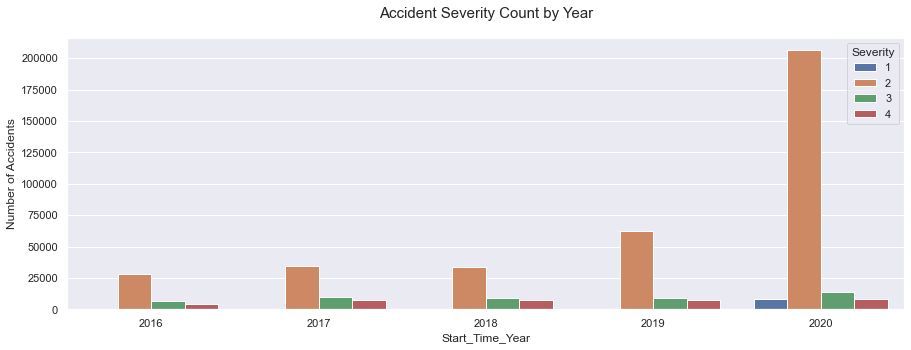

In [26]:
# define the figure size
plt.figure(figsize=(15, 5))

# create count plot for severity for each year
sns.countplot(x='Start_Time_Year', hue='Severity', data=train)

# set the ticks, labels and title
plt.title('Accident Severity Count by Year', size=15, y=1.05)
plt.ylabel("Number of Accidents")

# show plot
plt.show()

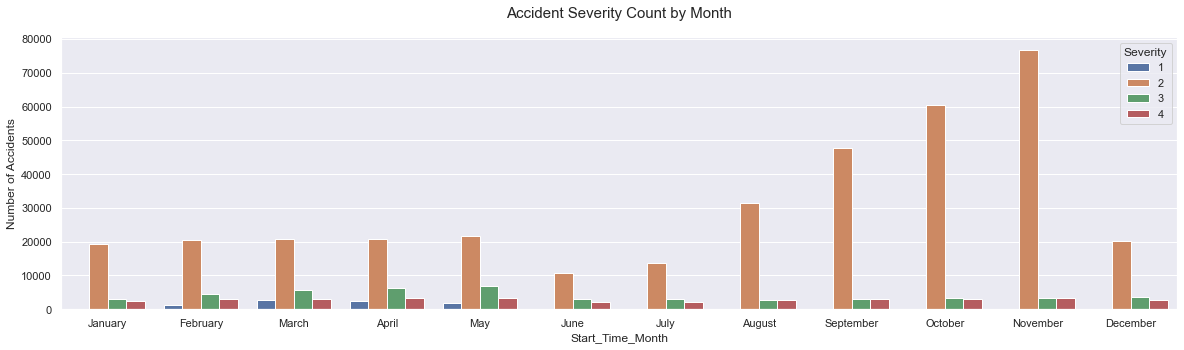

In [27]:
# import calendar for getting the month and week names
import calendar

# define the plot size
plt.figure(figsize=(20, 5))

# create count plot for severity for each month
sns.countplot(x='Start_Time_Month', hue='Severity', data=train)

# set itle, labels and ticks
plt.title('Accident Severity Count by Month', size=15, y=1.05)
plt.ylabel("Number of Accidents")
plt.xticks(np.arange(0, 12, 1), calendar.month_name[1:13])
# plt.yticks(np.linspace(25000,250000,6))

#show plot
plt.show()

# Severity Count by Hours of a Day

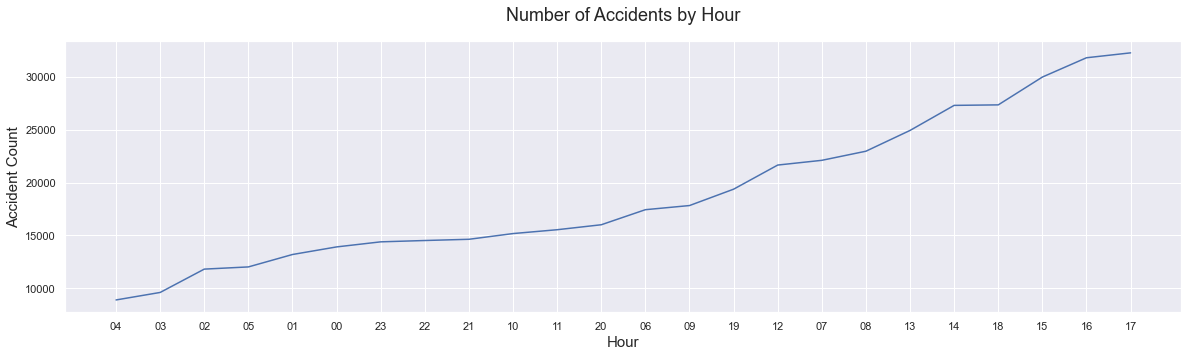

In [28]:
# get the accident count for each hour
df_hour = train['Start_Time_Hour'].value_counts().to_frame().reset_index().sort_values('Start_Time_Hour')
df_hour.columns = ['Hour', 'Counts']

# set fig size
plt.figure(figsize=(20, 5))
#set grid style
sns.set_style("darkgrid")
# crete a line plot for accident count for each hours as a time series
sns.lineplot(x='Hour', y='Counts', data=df_hour)
# set label, ticks and title
plt.xticks(df_hour['Hour'])
plt.ylabel('Accident Count', size=15)
plt.xlabel('Hour', size=15)
plt.title('Number of Accidents by Hour', size=18, y=1.05)
# show graph
plt.show()

# Severity Count by Month

In [29]:
# TRAIN 
# select numerical columns 
train_numeric = train.select_dtypes(include=[np.number])
numeric_cols = train_numeric.columns.values
# Number of columns
num = len(numeric_cols)
print("Number of numeric columns in TRAIN: ", num)
# Print Column names
print("Numerical columns of TRAIN dataset:", numeric_cols, "\n")
# select non-numeric columns
train_non_numeric = train.select_dtypes(exclude=[np.number])
non_numeric_cols = train_non_numeric.columns.values
# Number of columns
num = len(non_numeric_cols)
print("Number of non-numeric columns in TRAIN: ", num)
print("Non-numerical columns of TRAIN dataset:", non_numeric_cols, "\n\n")

# TEST
# select numerical columns 
test_numeric = test.select_dtypes(include=[np.number])
numeric_cols = test_numeric.columns.values
# Number of columns
num = len(numeric_cols)
print("Number of numeric columns in TEST: ", num)
# Print Column names
print("Numerical columns of TEST dataset:", numeric_cols, "\n")
# select non-numeric columns
test_non_numeric = test.select_dtypes(exclude=[np.number])
non_numeric_cols = test_non_numeric.columns.values
# Number of columns
num = len(non_numeric_cols)
print("Number of non-numeric columns in TEST: ", num)
print("Non-numerical columns of TEST dataset:", non_numeric_cols, "\n\n")

# VALIDATION
# select numerical columns 
validation_numeric = validation.select_dtypes(include=[np.number])
numeric_cols = validation_numeric.columns.values
# Number of columns
num = len(numeric_cols)
print("Number of numeric columns in VALIDATION: ", num)
# Print Column names
print("Numerical columns of VALIDATION dataset:", numeric_cols, "\n")
# select non-numeric columns
validation_non_numeric = validation.select_dtypes(exclude=[np.number])
non_numeric_cols = validation_non_numeric.columns.values
# Number of columns
num = len(non_numeric_cols)
print("Number of non-numeric columns in VALIDATION: ", num)
print("Non-numerical columns of VALIDATION dataset:", non_numeric_cols, "\n\n")

Number of numeric columns in TRAIN:  12
Numerical columns of TRAIN dataset: ['Severity' 'Start_Lat' 'Start_Lng' 'End_Lat' 'End_Lng' 'Distance(mi)'
 'Temperature(F)' 'Humidity(%)' 'Pressure(in)' 'Visibility(mi)'
 'Wind_Speed(mph)' 'Precipitation(in)'] 

Number of non-numeric columns in TRAIN:  34
Non-numerical columns of TRAIN dataset: ['Side' 'City' 'County' 'State' 'Zipcode' 'Timezone' 'Airport_Code'
 'Wind_Direction' 'Weather_Condition' 'Amenity' 'Bump' 'Crossing'
 'Give_Way' 'Junction' 'No_Exit' 'Railway' 'Roundabout' 'Station' 'Stop'
 'Traffic_Calming' 'Traffic_Signal' 'Sunrise_Sunset' 'Civil_Twilight'
 'Nautical_Twilight' 'Astronomical_Twilight' 'Start_Time_Month'
 'Start_Time_Year' 'Start_Time_Hour' 'End_Time_Month' 'End_Time_Year'
 'End_Time_Hour' 'Weather_Timestamp_Month' 'Weather_Timestamp_Year'
 'Weather_Time_Hour'] 


Number of numeric columns in TEST:  11
Numerical columns of TEST dataset: ['Start_Lat' 'Start_Lng' 'End_Lat' 'End_Lng' 'Distance(mi)'
 'Temperature(F)' 'Humidi

# Impute MODE and MEDIAN by using GROUP BY
According to the "A Countrywide Traffic Accident Dataset.", arXiv preprint arXiv:1906.05409 (2019): "Weather Underground API [25] to obtain weather information for each accident. Raw weather data was collected from 1,977 weather stations located in airports all around the United States. "

#### Filling Missing values of Precipitation depending on Weather Conditions
Since Precipitation totally depends on Weather Condition we can use our categorical features of weather to predict and fill the precipitation

These are the Precipitation(in) based on rain

Light rain — when the precipitation rate is < 2.5 mm (0.098 in) per hour

Moderate rain — when the precipitation rate is between 2.5 mm (0.098 in) - 7.6 mm (0.30 in) or 10 mm (0.39 in) per hour

Heavy rain — when the precipitation rate is > 7.6 mm (0.30 in) per hour, or between 10 mm (0.39 in) and 50 mm (2.0 in) per hour

Violent rain — when the precipitation rate is > 50 mm (2.0 in) per hour

For each type of Rain we will find the mean and median and fill with random values between them

<a id="2.4"></a>
## 2.4 Value Imputation
Most of the rest columns only have small missing part that can be filled. (It is not absolutely necessary though, we can also just drop na)
### Continuous Weather Data
Continuous weather features with missing values:

1. Temperature(F)

2. Humidity(%)

3. Pressure(in)

4. Visibility(mi)

5. Wind_Speed(mph)

`apply` + `pd.to_numeric` + `mask` + `fillna`

Before imputation, weather features will be grouped by location and time first, to which weather is naturally related. 'Airport_Code' is selected as location feature because the sources of weather data are airport-based weather stations. Then the data will be grouped by 'Start_Month' rather than 'Start_Hour' because using the former is computationally cheaper and remains less missing values. Finally, missing values will be replaced by median value of each group. 

# Weather Condition
Weather-related vehicle accidents kill more people annually than large-scale weather disasters(source: weather.com). According to Road Weather Management Program, most weather-related crashes happen on wet-pavement and during rainfall. Winter-condition and fog are another two main reasons for weather-related accidents. To extract these three weather conditions, we first look at what we have in 'Weather_Condition' Feature.

#### Weather condition histogram
With the following code we can plot the histogram of the weather condition column.

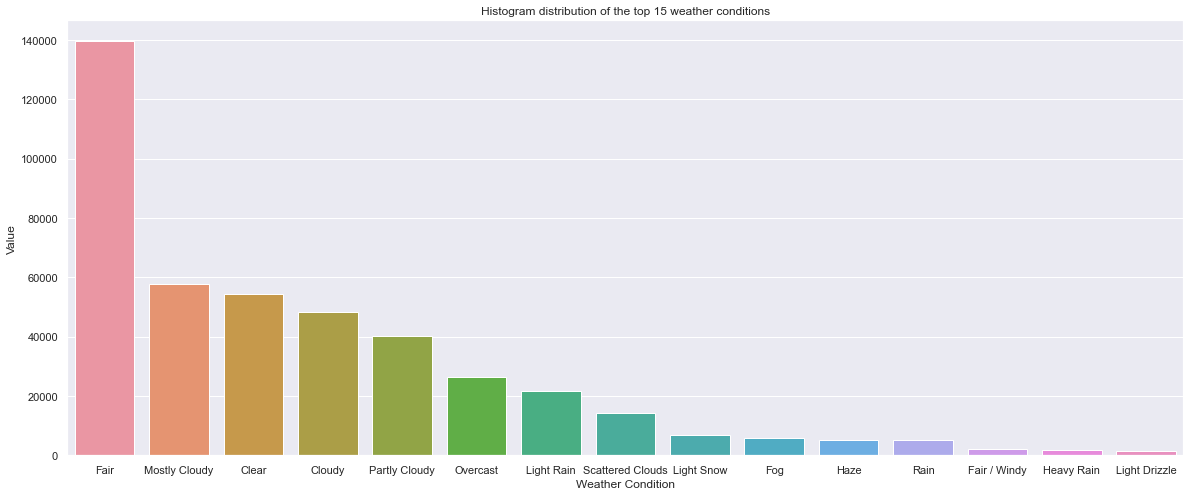

In [30]:
counts = train["Weather_Condition"].value_counts()[:15]
plt.figure(figsize=(20, 8))
plt.title("Histogram distribution of the top 15 weather conditions")
sns.barplot(counts.index, counts.values)
plt.xlabel("Weather Condition")
plt.ylabel("Value")
plt.show()

In [31]:
train.Weather_Condition.value_counts()

Fair                            139619
Mostly Cloudy                    57681
Clear                            54287
Cloudy                           48247
Partly Cloudy                    40041
Overcast                         26284
Light Rain                       21610
Scattered Clouds                 14114
Light Snow                        6683
Fog                               5909
Haze                              5288
Rain                              5206
Fair / Windy                      1975
Heavy Rain                        1933
Light Drizzle                     1325
Smoke                             1130
Mostly Cloudy / Windy             1125
Cloudy / Windy                     978
Snow                               831
Partly Cloudy / Windy              638
Light Rain / Windy                 581
T-Storm                            463
Thunder in the Vicinity            386
Wintry Mix                         376
Light Rain with Thunder            350
Thunder                  

In [32]:
def simplify_weather_condition(df):
    df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
    df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
    df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
    df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
    df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
    df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
    df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
    df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
    df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
    df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
    df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

    print(df["Weather_Condition"].unique())


simplify_weather_condition(train)
simplify_weather_condition(test)
simplify_weather_condition(validation)

train_unique_weather = train["Weather_Condition"].unique()
test_unique_weather = test["Weather_Condition"].unique()
validation_unique_weather = validation["Weather_Condition"].unique()

<StringArray>
[      'Cloudy',         'Snow',           <NA>,        'Clear',
         'Rain',          'Fog', 'Thunderstorm',        'Windy',
         'Hail',        'Smoke',         'Sand',      'Tornado']
Length: 12, dtype: string
<StringArray>
[      'Cloudy',         'Snow',         'Rain',        'Clear',
 'Thunderstorm',           <NA>,          'Fog',        'Smoke',
        'Windy',         'Sand',         'Hail']
Length: 11, dtype: string
<StringArray>
[      'Cloudy',         'Snow',        'Clear',           <NA>,
         'Rain',          'Fog',        'Smoke', 'Thunderstorm',
         'Hail',        'Windy',         'Sand']
Length: 11, dtype: string


### Handling NAN for other Weather Attribute features

In [33]:
# from collections import Counter
# %time
# # replace the missing nan values with normal distribution depending on different time period
# train['Airport_Code'] = train['Airport_Code'].fillna(train['Airport_Code'].mode()[0]) 

# weather_columns = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

# def fill_na_weather_columns(df, weather_columns):
#     for weather_prop in weather_columns:
#         # Take the median of the weather condition for the Start_Time_Hour in the Start_Time_Month to fillna
#         df[weather_prop] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month', 'Start_Time_Hour'])[
#             weather_prop].apply(
#             lambda x: x.fillna(x.median()))
#         print(weather_prop + " fill type 1 for Nan   : " + df[weather_prop].isnull().sum().astype(str))
#         # Take the median of the weather condition for a Start_Time_Month in the Start_Time_Year to fillna
#         df[weather_prop] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month'])[weather_prop].apply(
#             lambda x: x.fillna(x.median()))
#         print(weather_prop + " fill type 2 for Nan : " + df[weather_prop].isnull().sum().astype(str))
#         df[weather_prop] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month'])[weather_prop].apply(
#             lambda x: x.fillna(x.median()))
#         print(weather_prop + " fill type 2 for Nan : " + df[weather_prop].isnull().sum().astype(str))

# fill_na_weather_columns(train, weather_columns)
# fill_na_weather_columns(test, weather_columns)
# fill_na_weather_columns(validation, weather_columns)

### Weather direction is a cateorical feature with labels which needs a different approach to fill in the values, considering this scenario we can use most common function form counter to fill the values

In [34]:
# display missing values in descending
print("Missing values in TRAIN dataset in ascending: \n", train.isnull().sum().sort_values(ascending=False))
print("Missing values in TEST dataset in ascending: \n", test.isnull().sum().sort_values(ascending=False))
print("Missing values in VALIDATION dataset in ascending: \n", validation.isnull().sum().sort_values(ascending=False))

Missing values in TRAIN dataset in ascending: 
 Precipitation(in)          153413
Wind_Speed(mph)             38716
Humidity(%)                 13670
Weather_Condition           13306
Visibility(mi)              13276
Temperature(F)              12910
Wind_Direction              12570
Pressure(in)                10865
Airport_Code                 1294
Timezone                      690
Zipcode                       277
Sunrise_Sunset                  0
Civil_Twilight                  0
Nautical_Twilight               0
Astronomical_Twilight           0
Traffic_Signal                  0
Traffic_Calming                 0
Severity                        0
Station                         0
Start_Time_Month                0
Start_Time_Year                 0
Start_Time_Hour                 0
End_Time_Month                  0
End_Time_Year                   0
End_Time_Hour                   0
Weather_Timestamp_Month         0
Weather_Timestamp_Year          0
Stop                            0


There still are some missing values but much less. Just dropna by these features for the sake of simplicity.

In [35]:
def impute_median_num_col(df, numeric_col):
    # Imputes mode to NAN to the rest of categorical columns 
    for column in numeric_col:
        df[column].fillna(df[column].median(), inplace=True)


impute_median_num_col(train, train_numeric)
impute_median_num_col(test, test_numeric)
impute_median_num_col(validation, validation_numeric)

# Frequent Categorical Imputation:
This is a method in which we assume that there is random order of missing values(MAR - Missing at Random) and there's a majority of these missing values.

Under this approach we replace the missing values with the most common class, Hence the first step is to find out which category occurred most in each category using mode().

[The mode of a set of values is the value that appears most often]

#### This is a very simple and one of the most basic approaches to handle missing values in our categorical columns, yet not a preferred one.

+ This can distort the relation of the most frequent class and,
+ Predictions may become biased due to columns that have max number of null values.

In [36]:
%time
from collections import Counter


def fill_mode_wind_direction(df):
    # grouping data to fill NAs with majority value
    df['Wind_Direction'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month', 'Start_Time_Hour'])[
        'Wind_Direction'].apply(
        lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull()) == False else x)
    print('Wind_Direction' + " fill type 1 for Nan : " + df['Wind_Direction'].isnull().sum().astype(str))
    df['Wind_Direction'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month'])['Wind_Direction'].apply(
        lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull()) == False else x)
    print('Wind_Direction' + " fill type 2 for Nan : " + df['Wind_Direction'].isnull().sum().astype(str))
    df['Wind_Direction'] = df.groupby(['Airport_Code', 'Start_Time_Month'])['Wind_Direction'].apply(
        lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull()) == False else x)
    print('Wind_Direction' + " fill type 3 for Nan : " + df['Wind_Direction'].isnull().sum().astype(str))


fill_mode_wind_direction(train)
fill_mode_wind_direction(test)
fill_mode_wind_direction(validation)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 11.9 µs
Wind_Direction fill type 1 for Nan : 10311
Wind_Direction fill type 2 for Nan : 8585
Wind_Direction fill type 3 for Nan : 7758
Wind_Direction fill type 1 for Nan : 3691
Wind_Direction fill type 2 for Nan : 2953
Wind_Direction fill type 3 for Nan : 2613
Wind_Direction fill type 1 for Nan : 3644
Wind_Direction fill type 2 for Nan : 2945
Wind_Direction fill type 3 for Nan : 2678


In [37]:
train_string = train.select_dtypes(include='string')
test_string = test.select_dtypes(include='string')
validation_string = validation.select_dtypes(include='string')


def impute_mode_num_col(df, string_col):
    # Imputes mode to NAN to the rest of categorical columns 
    for column in string_col:
        df[column].fillna(df[column].mode()[0], inplace=True)


impute_mode_num_col(train, train_string)
impute_mode_num_col(test, test_string)
impute_mode_num_col(validation, validation_string)

In [38]:
# display missing values in descending
print("Missing values in TRAIN in ascending: \n", missing_percentage(train))

Missing values in TRAIN in ascending: 
 Empty DataFrame
Columns: [Total, Percent]
Index: []


# Task 1.4: Typos
Check whether there are typos in the data. If there are any typos, correct.

# Shorten ad Simplify the Wind Direction

In [39]:
train.Wind_Direction.value_counts()

CALM        70228
Calm        23944
WNW         23497
NW          22910
W           21961
SSW         20986
WSW         20824
NNW         20557
S           20457
SW          19755
SSE         19628
SE          16648
N           16319
E           15810
ESE         15571
ENE         15298
NE          14702
NNE         14056
VAR         12326
West        12240
South       12144
North       10753
East         7239
Variable     6943
Name: Wind_Direction, dtype: Int64

In [40]:
def simplify_wind_direction(df):
    df.loc[df['Wind_Direction'] == 'Calm', 'Wind_Direction'] = 'CALM'
    df.loc[(df['Wind_Direction'] == 'West') | (df['Wind_Direction'] == 'WSW') | (
            df['Wind_Direction'] == 'WNW'), 'Wind_Direction'] = 'W'
    df.loc[(df['Wind_Direction'] == 'South') | (df['Wind_Direction'] == 'SSW') | (
            df['Wind_Direction'] == 'SSE'), 'Wind_Direction'] = 'S'
    df.loc[(df['Wind_Direction'] == 'North') | (df['Wind_Direction'] == 'NNW') | (
            df['Wind_Direction'] == 'NNE'), 'Wind_Direction'] = 'N'
    df.loc[(df['Wind_Direction'] == 'East') | (df['Wind_Direction'] == 'ESE') | (
            df['Wind_Direction'] == 'ENE'), 'Wind_Direction'] = 'E'
    df.loc[df['Wind_Direction'] == 'Variable', 'Wind_Direction'] = 'VAR'
    print("Wind Direction after simplification: ", df['Wind_Direction'].unique())


simplify_wind_direction(train)
simplify_wind_direction(test)
simplify_wind_direction(validation)

Wind Direction after simplification:  <StringArray>
['CALM', 'W', 'SW', 'NW', 'N', 'S', 'E', 'VAR', 'SE', 'NE']
Length: 10, dtype: string
Wind Direction after simplification:  <StringArray>
['SW', 'W', 'NW', 'SE', 'S', 'E', 'N', 'CALM', 'VAR', 'NE']
Length: 10, dtype: string
Wind Direction after simplification:  <StringArray>
['W', 'CALM', 'N', 'NW', 'SE', 'S', 'E', 'SW', 'NE', 'VAR']
Length: 10, dtype: string


### 1.4.3 Check general spelling errors

In [41]:
train_string = train.select_dtypes(include='string')

# Check if spelling errors, shoul clean further if the number of before checking and after checking are different
for col in train_string:
    print(f'Before: {col}: {len(set(train[col]))}; After: {col}: {len(set(train[col].str.title().str.strip()))}')

Before: Side: 2; After: Side: 2
Before: City: 8887; After: City: 8854
Before: County: 1535; After: County: 1522
Before: State: 49; After: State: 49
Before: Zipcode: 83284; After: Zipcode: 83284
Before: Timezone: 4; After: Timezone: 4
Before: Airport_Code: 1884; After: Airport_Code: 1884
Before: Wind_Direction: 10; After: Wind_Direction: 10
Before: Weather_Condition: 11; After: Weather_Condition: 11
Before: Sunrise_Sunset: 2; After: Sunrise_Sunset: 2
Before: Civil_Twilight: 2; After: Civil_Twilight: 2
Before: Nautical_Twilight: 2; After: Nautical_Twilight: 2
Before: Astronomical_Twilight: 2; After: Astronomical_Twilight: 2


**--->**
Indeed, there are typos in the `Street`, `City`, `County`, `Wind_Direction`. Let's fix it.

In [42]:
# Correct the errors
# train.Street = train.Street.str.title().str.strip()
train.City = train.City.str.title().str.strip()
train.County = train.County.str.title().str.strip()
train.Wind_Direction = train.Wind_Direction.str.title().str.strip()

# Correct the errors
# test.Street = test.Street.str.title().str.strip()
test.City = test.City.str.title().str.strip()
test.County = test.County.str.title().str.strip()
test.Wind_Direction = test.Wind_Direction.str.title().str.strip()

# validation.Street = validation.Street.str.title().str.strip()
validation.City = validation.City.str.title().str.strip()
validation.County = validation.County.str.title().str.strip()
validation.Wind_Direction = validation.Wind_Direction.str.title().str.strip()

In [43]:
# Check if spelling errors already fixed
for col in train_string:
    print(f'Before: {col}: {len(set(train[col]))}; After: {col}: {len(set(train[col].str.title().str.strip()))}')

Before: Side: 2; After: Side: 2
Before: City: 8854; After: City: 8854
Before: County: 1522; After: County: 1522
Before: State: 49; After: State: 49
Before: Zipcode: 83284; After: Zipcode: 83284
Before: Timezone: 4; After: Timezone: 4
Before: Airport_Code: 1884; After: Airport_Code: 1884
Before: Wind_Direction: 10; After: Wind_Direction: 10
Before: Weather_Condition: 11; After: Weather_Condition: 11
Before: Sunrise_Sunset: 2; After: Sunrise_Sunset: 2
Before: Civil_Twilight: 2; After: Civil_Twilight: 2
Before: Nautical_Twilight: 2; After: Nautical_Twilight: 2
Before: Astronomical_Twilight: 2; After: Astronomical_Twilight: 2


In [44]:
# test_string = test.select_dtypes(include='string')

# # Check if spelling errors, should clean further if the number of before checking and after checking are different
# for col in test_string:
#     print(f'Before: {col}: {len(set(test[col]))}; After: {col}: {len(set(test[col].str.title().str.strip()))}')

**--->**
Indeed, there are typos in the `Street`, `City`, `County`, `Wind_Direction`. Let's fix it.

# Task 1.5: Extra-whitespaces

Check whether there are instances of extra whitespaces in the data and demonstrate how to remove them by calling on an appropriate function.


### Why are white spaces a problem?

+ Comparison failures

String with and without blank spaces is not the same. `'Vietnmam'`"!= `' Vietnam'` these two ABCs are not equal, but the difference is so slight that you often don't notice. Without the quotes enclosing the string, you hardly would `Vietnmam`!=` Vietnam`. But the computer programs are incorruptible in the interpretation, and if these values are a merging key, you will receive an empty result.

+ NaN Value

Blank strings, spaces, and tabs are considered empty values represented as NaN in Pandas on many occasions. But an indefinite number of spaces is not turned into NaN values automatically, and you can get unexpected results because for example, **count(NaN) = 0** while **count("")= 1**.

+ Size

Even though the white spaces are almost invisible, pile millions of them into the file, and they will take some space. Other times they can overflow the size limit of your database column leading to an error in the better case and trimming the final character whose place was stolen by the blank space in front.

In [45]:
 from function import whitespace_remover

"""
        Remove extra leading and tailing whitespace from the data.
         pass dataframe as a parameter and apply whitespace_remover function on dataframe
"""

whitespace_remover(train)
whitespace_remover(test)
whitespace_remover(validation)

# Task 1.6: Upper/Lower-case

+ Categorical data should have all the uniform formatting style, such as lower case. 

+ I will cast all categorical data to lower case, I can use the following statement:


In [46]:
# Cast all values inside the dataframe (except the columns' name) into lowercase
train = train.applymap(lambda s: s.lower() if type(s) == str else s)
# test = test.applymap(lambda s: s.lower() if type(s) == str else s) // I dont want my ID to be lower case
validation = validation.applymap(lambda s: s.lower() if type(s) == str else s)

# Task 1.7: Sanity checks
Design and run a small test-suite, consisting of a series of sanity checks to test for the presence of **impossible values** and **outliers** for each attribute.

### 1.7.1 Check for the presence of duplicates

+ The **user presses the submit button twice.** In order to check whether a record is duplicated or not, I can exploit the `duplicated()` function, which returns `True` if a record has other duplicates, `False` otherwise.

+ Use the pandas function `.drop_duplicates()` to remove copied rows from a DataFrame

+ Could not drop duplicated in TEST since I'll use it to compete in Kaggle learboard

In [47]:
# Print out the .value_counts() of the duplicates Series to see how many rows are exact duplicates
print("Number of duplicated records in TRAIN: ", train.duplicated().sum())
train.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(train.index), "\n\n")

print("Number of duplicated records in VALIDATION in TRAIN: ", validation.duplicated().sum())
validation.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in VALIDATION:", len(validation.index))

Number of duplicated records in TRAIN:  15679
Number of rows after drop of duplicates: 439117 


Number of duplicated records in VALIDATION in TRAIN:  1871
Number of rows after drop of duplicates in VALIDATION: 149722


#### Impossible values

In [49]:
train.columns.values

array(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Timezone', 'Airport_Code', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Start_Time_Month',
       'Start_Time_Year', 'Start_Time_Hour', 'End_Time_Month',
       'End_Time_Year', 'End_Time_Hour', 'Weather_Timestamp_Month',
       'Weather_Timestamp_Year', 'Weather_Time_Hour'], dtype=object)

In [50]:
train.describe().round(2)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00
mean,2.24,36.93,-98.73,36.93,-98.73,0.59,59.69,64.69,29.57,9.15,7.59,0.01
std,0.61,5.16,18.48,5.16,18.48,1.63,18.04,22.96,1.00,2.87,5.25,0.10
min,1.00,24.57,-124.50,24.57,-124.50,0.00,-89.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,33.86,-118.22,33.86,-118.22,0.00,48.00,49.00,29.47,10.00,4.60,0.00
50%,2.00,37.35,-94.53,37.36,-94.53,0.18,61.00,68.00,29.88,10.00,7.00,0.00
75%,2.00,40.73,-80.94,40.73,-80.94,0.59,73.00,84.00,30.04,10.00,10.00,0.00
max,4.00,49.00,-67.40,49.00,-67.40,150.14,168.80,100.00,38.94,120.00,518.00,24.00


**-----> OSERVATION**
We can see that the minimum value for "Pressure(in)", "Visibility(mi)" is 0, meaning that some records are missing them and replaced them by putting zeros. For this reason, we are going to drop the records with missing values for these two columns.

---> We can see that the minimum value is 0, meaning that some records are missing them and replaced them by putting zeros. For this reason, we are going to drop the records with missing values for these two columns.


In [61]:
train = train[train["Pressure(in)"] != 0]
train = train[train["Visibility(mi)"] != 0]

validation = validation[validation["Pressure(in)"] != 0]
validation = validation[validation["Visibility(mi)"] != 0]

print(train[["Pressure(in)", "Visibility(mi)"]].describe().round(2))

       Pressure(in)  Visibility(mi)
count     438700.00       438700.00
mean          29.57            9.16
std            1.00            2.86
min            0.30            0.06
25%           29.47           10.00
50%           29.88           10.00
75%           30.04           10.00
max           38.94          120.00


### WRITING DATA BACK TO FILES
After completing your analysis and adding new columns, I write the results back to a file and get that data to visualize on Dash App. Otherwise, the data will be lost when the Jupyter Lab shuts down.

In [52]:
# To write the data from the data frame into a file, use the to_csv function.
# train.to_csv('cosc2789-2021/cleaned_train.csv', index=False)
test.to_csv('cosc2789-2021/cleaned_test.csv', index=False)
# validation.to_csv('cosc2789-2021/cleaned_validation.csv', index=False)

**---------> OBSERVATION**
+ As we can see, most of the accidents occured near a traffic signal, expecially where a junction or a crossing was present.

+ The fourth most common road feature, instead, was the presence of a nearby station, probably because of the high presence of vehicles.

# 2.4 Medium distance by severity
Let's now analyze the medium distance of an accident based on its severity.

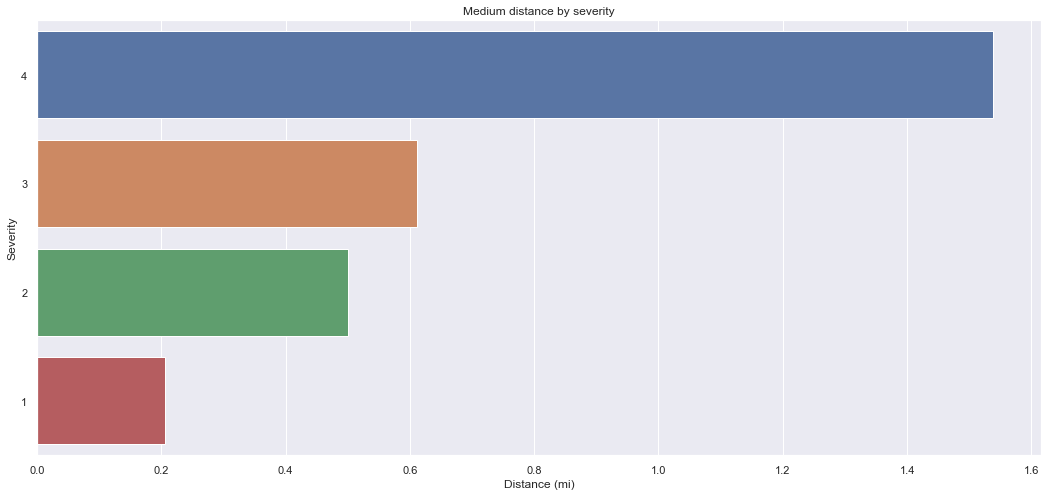

In [53]:
severity_distance = train.groupby("Severity").mean()["Distance(mi)"].sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Medium distance by severity")
sns.barplot(severity_distance.values, severity_distance.index, orient="h", order=severity_distance.index)
plt.xlabel("Distance (mi)")
plt.show()

**------------> OBSERVATION**
+ In this graph we can see that the distance of the accident is more or less proportional to the severity, and in fact accidents with severity 4 have the longest distance.

# Longtitude and Latitude

As, we can see the density of points is more at the eastern and western coasts as compared to the middle of the country

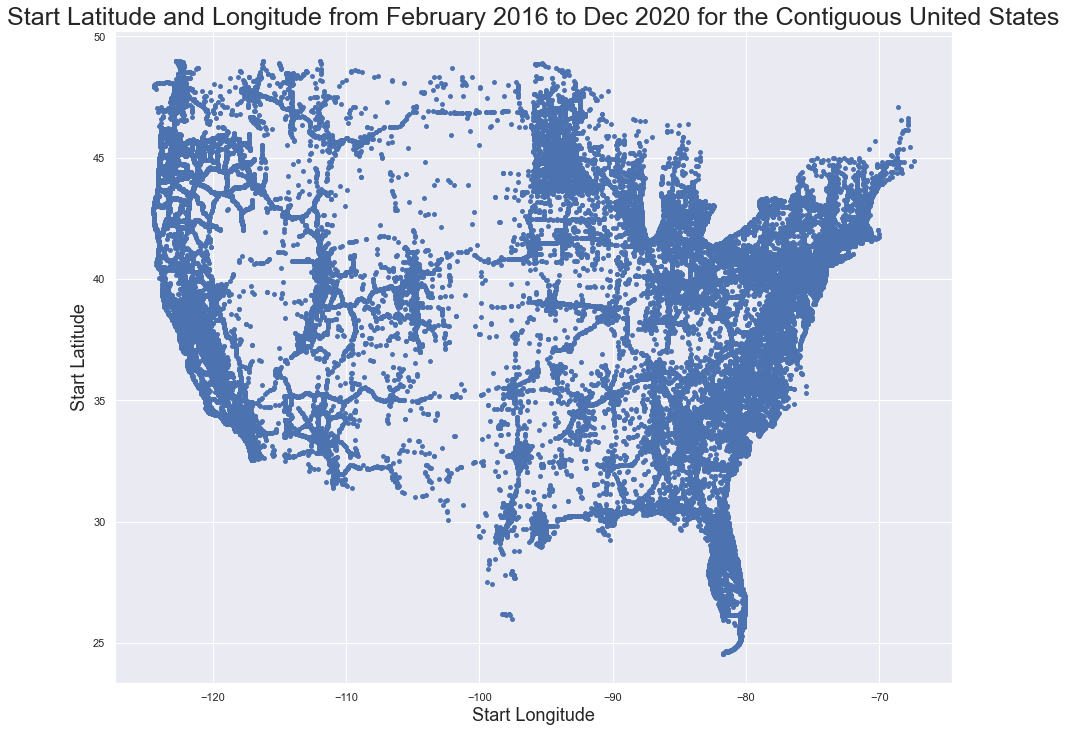

In [54]:
from matplotlib import pyplot as plt

# Make scatter for Latitude and Longitude
plt.figure(figsize=(15, 12))
plt.scatter(x=train.Start_Lng, y=train.Start_Lat, s=15)
plt.title("Start Latitude and Longitude from February 2016 to Dec 2020 for the Contiguous United States", fontsize=25)
plt.xlabel("Start Longitude", fontsize=18)
plt.ylabel("Start Latitude", fontsize=18)
plt.show()

<h1 style="color:#ffc0cb;font-size:30px;font-family:Georgia;text-align:center;"><strong>Conclusion<strong style="color:black;font-size:25px;font-family:Georgia;"></strong></h1>

+ The number of unique cities where accidents have taken place in USA: 10658
+ The Top 5 cities of USA with maximum number of accidents in 4 years are: Los Angeles, Miami, Charlotte, Houston, Dallas
+ The percentage of cities have more than 1000 accidents in a year is: 2.3552594538800786%
+ 1167 cities of USA have had only accident in 4 years!
+ The maximum number of accidents have taken place at around 4-5P.M. which can be a result of the fact that most people are travelling back to their homes after work which causes a rush hour.
+ Suprisingly, maximum number of accidents occured on a Thursday and not on a weekend. This means that maybe, not a lot of people travel on the weekends
+ Los Angeles is the city with highest number of accidents in USA (2016-2020)
+ Miami is the city with 2nd highest number of accidents in USA (2016-2020)
+ California is the State with highest number of accidents in USA (2016-2020)
+ Florida is the state with 2nd highest number of accidents in USA (2016-2020)
+ In 80% Cases of road accidents, the impact on the traffic was Moderate - 2
+ In 10% Cases of road accidents, the impact on the traffic was Severe - 3

# REFERENCES
+ Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. [“A Countrywide Traffic Accident Dataset.”](https://arxiv.org/abs/1906.05409), arXiv preprint arXiv:1906.05409 (2019). Access Nov 27, 2021.

+ Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. [“Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.”](https://arxiv.org/abs/1909.09638) In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019. Access Nov 27, 2021.

[14] Sobhan Moosavi, Mohammad Hossein Samavatian, Arnab Nandi, Srinivasan
Parthasarathy, and Rajiv Ramnath. 2019. Short and Long-term Pattern Discovery
Over Large-Scale Geo-Spatiotemporal Data. In Proceedings of the 25th ACM
SIGKDD International Conference on Knowledge Discovery & Data Mining. ACM.

<a href="https://towardsdatascience.com/usa-accidents-data-analysis-d130843cde02">USA Accidents Data Analysis</a>

https://www.kaggle.com/sobhanmoosavi/us-accidents/discussion/113055

<a href="https://www.kaggle.com/deepakdeepu8978/how-severity-the-accidents-is">how Severity the Accidents is ?</a>

<a href="https://www.kaggle.com/trivenisaraswathi/severity-prediction-in-sfo-bay-area">Severity Prediction in SFO Bay Area</a>

<a href="https://www.kaggle.com/phip2014/ml-to-predict-accident-severity-pa-mont"> ML to Predict Accident Severity_PA_Mont</a>

<a href="https://www.kaggle.com/suyash0010/severity-and-time-wasted-analysis"> severity and hours wasted</a>

<a href="https://www.kaggle.com/nikitagrec/usa-accidents-plotly-maps-text-classification"> USA Accidents Plotly maps + text classification </a>